# K_NN Implementation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: ylabel='count'>

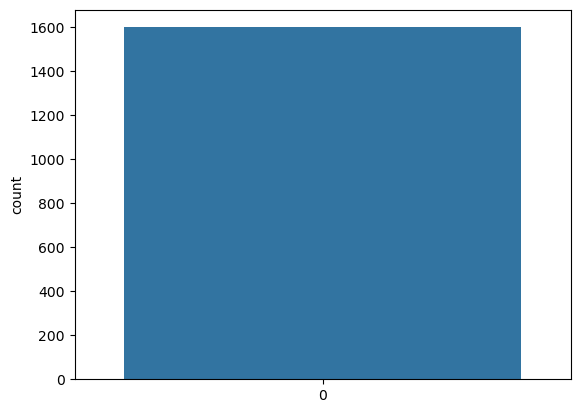

In [3]:
sns.countplot(data['quality'])

In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

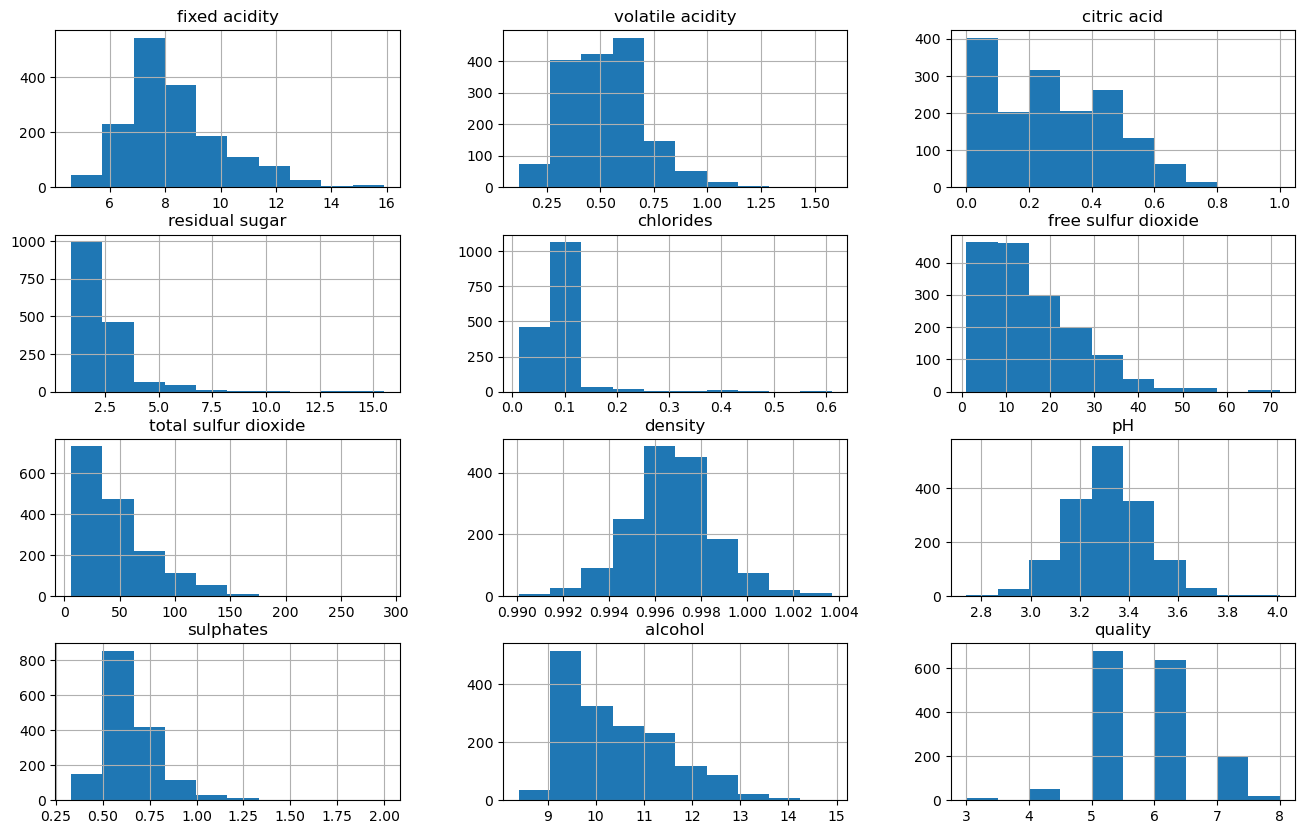

In [7]:
data.hist(figsize=(16,10))

<Axes: >

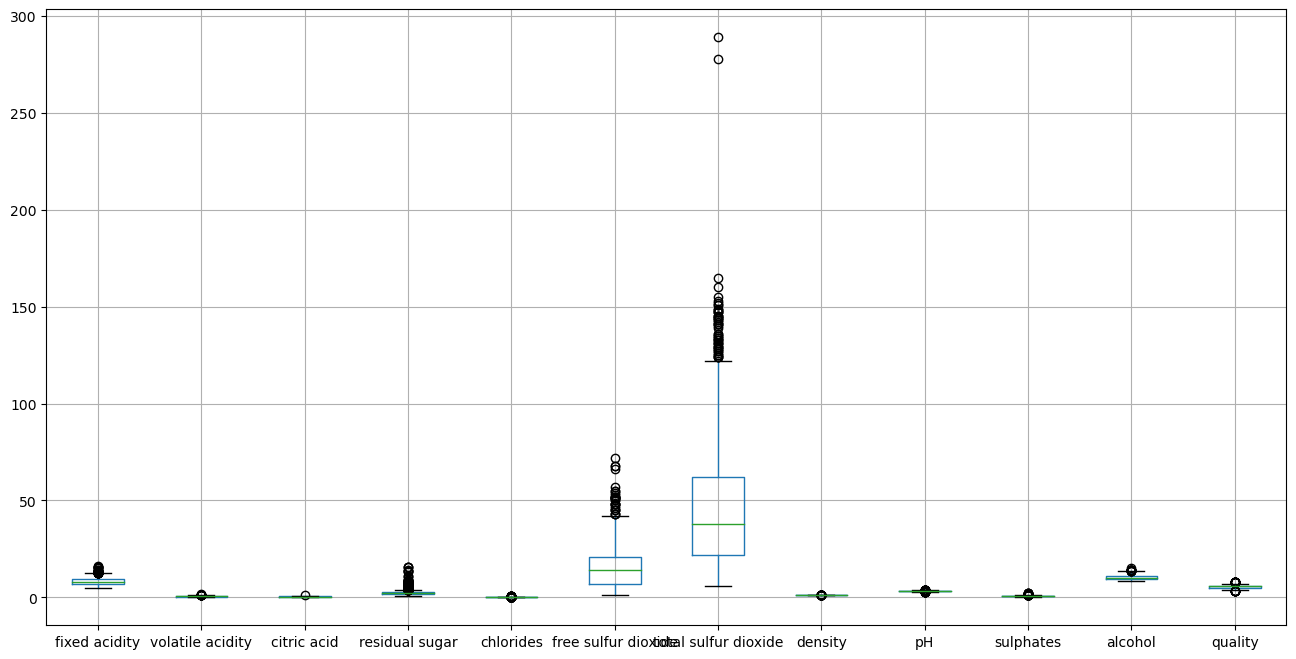

In [9]:
data.boxplot(figsize=(16,8))

<Axes: ylabel='count'>

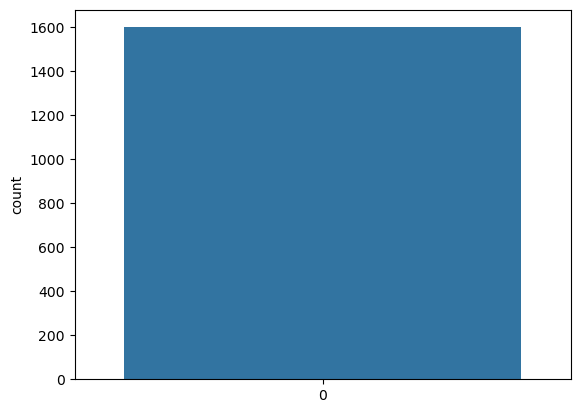

In [14]:
sns.countplot(data['chlorides'])

# Model bulding

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [21]:
x.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [23]:
y.head(1)

0    5
Name: quality, dtype: int64

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print('Training data-x - shape:\t',xtrain.shape)
print()
print('Training data-y - shape:\t',ytrain.shape)
print()
print('Testing data shape\n')
print('testing data(x-input) shape :\t',xtest.shape)
print()
print('testing data(y-Outcome) shape :\t',ytest.shape)

Training data-x - shape:	 (1279, 11)

Training data-y - shape:	 (1279,)

Testing data shape

testing data(x-input) shape :	 (320, 11)

testing data(y-Outcome) shape :	 (320,)


In [26]:
knn_model=KNeighborsClassifier(n_neighbors=3)
print('**KNN Classifier Model**')
print('Training phase\n')
knn_model.fit(xtrain,ytrain)
print('Training is completed')
print('='*100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Prdicted Class Labels are:\n', ypred)
print('Test is also done')
print()
print('='*100)

**KNN Classifier Model**
Training phase

Training is completed

Testing Phase

Prdicted Class Labels are:
 [7 5 4 5 6 5 6 6 5 5 4 6 6 6 5 7 6 6 6 4 4 6 6 6 5 7 5 5 7 6 5 5 5 5 5 5 6
 6 7 4 5 5 6 6 5 6 5 5 5 5 5 5 5 5 7 5 5 5 5 5 6 6 6 6 6 6 7 6 6 4 5 5 5 5
 5 5 5 5 5 5 6 4 7 4 7 5 5 6 5 6 7 5 6 4 4 6 5 5 5 5 6 5 3 5 5 6 5 6 6 6 5
 5 5 6 5 6 5 6 6 6 5 5 6 5 7 5 6 4 6 5 6 5 5 6 7 5 6 5 5 6 5 6 6 6 3 5 5 5
 6 5 7 6 5 5 7 4 7 5 6 6 5 5 6 5 7 6 7 5 6 5 6 6 7 6 5 5 5 5 5 6 5 6 5 6 5
 7 5 5 6 6 4 5 6 4 4 6 5 6 6 7 6 5 5 5 5 5 6 7 5 6 7 4 5 6 5 7 6 5 6 5 6 6
 5 7 5 5 5 6 5 5 5 5 5 5 5 5 3 6 5 5 5 7 5 6 5 5 5 5 5 6 5 5 5 5 7 6 5 5 6
 6 5 6 5 6 5 7 5 5 5 5 5 6 5 6 5 5 5 5 6 6 3 6 5 5 7 5 4 5 6 7 7 6 5 6 3 5
 6 5 7 5 7 6 7 6 6 5 6 6 5 7 5 5 7 5 5 6 5 6 5 6]
Test is also done



# Performance Measures

In [27]:
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('Confussinon matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classificatino report: \n',classification_report(ytest,ypred))

Accuracy Score:	
 0.503125

Confussinon matrix:
 [[ 0  0  0  1  0  0]
 [ 2  1  3  3  0  0]
 [ 1  6 84 25  6  0]
 [ 1 10 63 62 11  0]
 [ 1  0  9 12 14  0]
 [ 0  0  0  1  4  0]]

Classificatino report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.11      0.08         9
           5       0.53      0.69      0.60       122
           6       0.60      0.42      0.49       147
           7       0.40      0.39      0.39        36
           8       0.00      0.00      0.00         5

    accuracy                           0.50       320
   macro avg       0.26      0.27      0.26       320
weighted avg       0.52      0.50      0.50       320



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_data=sc.fit_transform(data)

In [14]:
sc_data[0]

array([-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
       -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
       -0.96024611, -0.78782264])

In [15]:
sc_data.shape

(1599, 12)

# In session Practice

After scale - Build the KNN model - Observe the performance

Try with Different K [3,5,7,9,11...] and find the optimum k to get better performance

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature data and 'y' is the target labels

# Step 2: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 4: Build the KNN model for different k values and evaluate performance
k_values = [3, 5, 7, 9, 11, 13]  # Add more values as needed
best_accuracy = 0
optimal_k = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")
    
    # Find the best k (highest accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        optimal_k = k

print(f"\nOptimal k for better performance: {optimal_k} with accuracy: {best_accuracy}")


Accuracy for k=3: 0.515625
Accuracy for k=5: 0.546875
Accuracy for k=7: 0.55
Accuracy for k=9: 0.559375
Accuracy for k=11: 0.571875
Accuracy for k=13: 0.56875

Optimal k for better performance: 11 with accuracy: 0.571875
